# README.md

# Research question: What are the T recovery dates and values for the recovery group, and last captured T test date and value for the non recovery group, with TR critia, 75 and 300 ng/dL? 

# Note initial was misspelled as "inital"


## Table of Contents
* [Read data, clean up and get stats](#first-bullet)
* [Match T test date and value just before ADT](#second-bullet)
* [ Use T value >=75 as a TR critrion](#third-bullet)
* [ Use T value >=300 as a TR critrion](#fouth-bullet)

In [95]:
import numpy as np
import pandas as pd
import sys, getopt
import csv
from datetime import datetime
from datetime import timedelta, date
import itertools

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

# Read data, clean up and get stats <a class="anchor" id="first-bullet"></a>

In [96]:
df_adt=pd.read_excel("Inital_ADT_use_time_window_121pts_updated_Jan28.xls", header=0)
df_adt.fillna('', inplace=True)

#t test results for 4490 pts
df_tvalue=pd.read_excel("pca_tresults_20210119_BP.xlsx", header=0)

In [109]:
df_adt_pt=df_adt["person_id"].to_list()

In [110]:
df_adt[:5]

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
0,12,2013-05-06 00:00:00,2013-05-06 00:00:00,0 days 00:00:00.000000000,0,0
1,18,2013-11-12 00:00:00,2014-03-13 00:00:00,121 days 00:00:00.000000000,121,1
2,25,2013-08-01 00:00:00,2014-02-18 00:00:00,201 days 00:00:00.000000000,201,2
3,26,2014-11-26 00:00:00,2016-09-14 00:00:00,658 days 00:00:00.000000000,658,3
4,38,2015-11-18 00:00:00,2016-07-18 00:00:00,243 days 00:00:00.000000000,243,4


In [111]:
adt_pt_list=df_adt["person_id"].to_list()

In [112]:
df_tvalue

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351
1,2,2,2003,1.0,7.0,2003-01-07,2007-01-09,49041-7,TESTOSTERONE,304
2,2,2,2003,1.0,7.0,2003-01-07,2007-05-17,49041-7,TESTOSTERONE,259
3,2,2,2003,1.0,7.0,2003-01-07,2007-06-12,49041-7,TESTOSTERONE,382
4,2,2,2003,1.0,7.0,2003-01-07,2007-06-28,49041-7,TESTOSTERONE,439
...,...,...,...,...,...,...,...,...,...,...
18638,208953,2,2020,9.0,22.0,2020-09-22,2020-06-30,49041-7,TESTOSTERONE,557.28
18639,209160,2,2020,8.0,11.0,2020-08-11,2012-07-19,49041-7,TESTOSTERONE,219.1
18640,209416,2,2019,5.0,10.0,2019-05-10,2013-06-11,49041-7,TESTOSTERONE,211.15
18641,209416,2,2019,5.0,10.0,2019-05-10,2013-07-02,49041-7,TESTOSTERONE,150.7


In [113]:
df_tvalue_grouped=df_tvalue.groupby(["person_id"]).size().reset_index(name='counts')
list_pt_test=df_tvalue_grouped["person_id"].to_list()
print("list of pt ids with t test results")
print(len(list_pt_test))
print("")

overlap_list=[x for x in adt_pt_list if x in  list_pt_test]
print(len(overlap_list))
print(len(adt_pt_list))

list of pt ids with t test results
4490

121
121


In [114]:
deleted_list=[]
for ind in df_tvalue.index:
    if (df_tvalue['test_results'][ind]=='CANCELED'): 
        deleted_list.append(ind) 
       
print(df_tvalue.shape)
for ind in deleted_list:
    df_tvalue.drop(index=ind,inplace=True)
print(df_tvalue.shape)

(18643, 10)
(18643, 10)


In [115]:
#get the list of pt ids
list_pts=df_adt["person_id"].to_list()

In [116]:
list_pts

[12,
 18,
 25,
 26,
 38,
 110,
 119,
 323,
 387,
 870,
 2526,
 2660,
 3079,
 3951,
 3995,
 5452,
 6077,
 6162,
 6445,
 6955,
 7236,
 8024,
 8544,
 9048,
 9233,
 9888,
 10578,
 10945,
 11482,
 11595,
 11613,
 11649,
 11651,
 11859,
 11861,
 11933,
 12187,
 12208,
 12275,
 12374,
 12426,
 12427,
 12720,
 13274,
 13609,
 13728,
 14846,
 15082,
 15202,
 15456,
 16116,
 16273,
 16477,
 17206,
 17341,
 17419,
 17559,
 17638,
 18362,
 19342,
 19566,
 20270,
 20929,
 20930,
 21003,
 21389,
 21480,
 21543,
 21613,
 21655,
 21938,
 22100,
 22103,
 22129,
 22567,
 22676,
 22860,
 23559,
 23945,
 24143,
 24226,
 24383,
 24562,
 24582,
 24782,
 24830,
 25017,
 25882,
 26082,
 26152,
 26854,
 27180,
 27458,
 27543,
 27966,
 28445,
 28474,
 29307,
 29359,
 30078,
 30211,
 30455,
 30492,
 30689,
 30997,
 31074,
 31131,
 31430,
 31676,
 32740,
 33531,
 33555,
 33586,
 33871,
 34207,
 34807,
 35033,
 36062,
 36369,
 36508,
 36535]

In [117]:
len(list_pts)

121

In [118]:
df_tvalue[:5]

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
0,2,2,2003,1.0,7.0,2003-01-07,2006-09-05,49041-7,TESTOSTERONE,351
1,2,2,2003,1.0,7.0,2003-01-07,2007-01-09,49041-7,TESTOSTERONE,304
2,2,2,2003,1.0,7.0,2003-01-07,2007-05-17,49041-7,TESTOSTERONE,259
3,2,2,2003,1.0,7.0,2003-01-07,2007-06-12,49041-7,TESTOSTERONE,382
4,2,2,2003,1.0,7.0,2003-01-07,2007-06-28,49041-7,TESTOSTERONE,439


In [119]:
i=12
df_tvalue_pt=df_tvalue[(df_tvalue["person_id"]==i)]
df_tvalue_pt

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
84,12,2,2012,10.0,24.0,2012-10-24,2012-11-01,49041-7,TESTOSTERONE,237.44
85,12,2,2012,10.0,24.0,2012-10-24,2013-05-06,49041-7,TESTOSTERONE,15.15
86,12,2,2012,10.0,24.0,2012-10-24,2014-01-28,49041-7,TESTOSTERONE,10.89
87,12,2,2012,10.0,24.0,2012-10-24,2014-10-07,49041-7,TESTOSTERONE,27.06
88,12,2,2012,10.0,24.0,2012-10-24,2015-01-13,49041-7,TESTOSTERONE,17.47
89,12,2,2012,10.0,24.0,2012-10-24,2015-05-19,49041-7,TESTOSTERONE,29.29
90,12,2,2012,10.0,24.0,2012-10-24,2015-09-08,49041-7,TESTOSTERONE,34.51
91,12,2,2012,10.0,24.0,2012-10-24,2016-01-19,49041-7,TESTOSTERONE,32.56
92,12,2,2012,10.0,24.0,2012-10-24,2016-05-18,49041-7,TESTOSTERONE,23.83
93,12,2,2012,10.0,24.0,2012-10-24,2017-06-13,49041-7,TESTOSTERONE,23.54


In [122]:
#check=df_adt_pt['inital_ADT_start_date']
#check=df_adt_pt['inital_ADT_start_date'].to_list()
#df1_pt.fillna('', inplace=True)
#df_adt_pt.replace('', np.NaN)
#df_adt_pt['inital_ADT_start_date'].notnull().values.any()

AttributeError: 'list' object has no attribute 'replace'

In [123]:
def closest(lst, K): 
      return lst[min(range(len(lst)), key = lambda i: abs(lst[i] - K))] 

In [124]:
df1=df_adt
df2=df_tvalue

list_pts_adt_table=df1["person_id"].to_list()
df2_pt=df2[(df2["person_id"] == 36062)]  
each_pt_tdates=df2_pt['result_date'].to_list()
each_pt_tdates

[Timestamp('2014-04-23 00:00:00'),
 Timestamp('2014-07-02 00:00:00'),
 Timestamp('2014-07-31 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2016-09-06 00:00:00'),
 Timestamp('2016-12-13 00:00:00'),
 Timestamp('2017-04-25 00:00:00'),
 Timestamp('2017-08-08 00:00:00'),
 Timestamp('2017-12-12 00:00:00'),
 Timestamp('2018-02-20 00:00:00'),
 Timestamp('2018-03-13 00:00:00'),
 Timestamp('2018-04-10 00:00:00'),
 Timestamp('2018-07-10 00:00:00'),
 Timestamp('2018-10-09 00:00:00'),
 Timestamp('2019-07-11 00:00:00'),
 Timestamp('2019-09-10 00:00:00'),
 Timestamp('2019-10-17 00:00:00'),
 Timestamp('2019-12-12 00:00:00'),
 Timestamp('2020-01-09 00:00:00'),
 Timestamp('2020-02-06 00:00:00'),
 Timestamp('2020-03-12 00:00:00')]

In [125]:
df1_pt=df1[(df1["person_id"] == 323)]  
df1_pt

,person_id,inital_ADT_start_date,inital_ADT_end_date,Inital_ADT_timewindow,Inital_ADT_time_window_days,index1
7,323,2015-06-18 00:00:00,2016-09-07 00:00:00,447 days 00:00:00.000000000,447,7


In [126]:
df2_pt=df2[(df2["person_id"] == 323)]  
df2_pt

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
473,323,2,2015,6.0,9.0,2015-06-09,2015-07-22,49041-7,TESTOSTERONE,26.74
474,323,2,2015,6.0,9.0,2015-06-09,2015-09-09,49041-7,TESTOSTERONE,15.82
475,323,2,2015,6.0,9.0,2015-06-09,2015-11-30,49041-7,TESTOSTERONE,10
476,323,2,2015,6.0,9.0,2015-06-09,2016-02-29,49041-7,TESTOSTERONE,15.02
477,323,2,2015,6.0,9.0,2015-06-09,2016-03-09,49041-7,TESTOSTERONE,14.17
478,323,2,2015,6.0,9.0,2015-06-09,2016-06-01,49041-7,TESTOSTERONE,15.93
479,323,2,2015,6.0,9.0,2015-06-09,2016-08-26,49041-7,TESTOSTERONE,18.49


In [127]:
#pd.to_datetime(df1_pt['inital_ADT_end_date'], utc=False)
a=df1_pt['inital_ADT_start_date'].to_list()[0]
#df.dates.values.astype('M8[D]')

In [128]:
a=df1_pt['inital_ADT_start_date'].to_list()[0]

# Match T test date and value after ADT and assign T Recovery status<a class="anchor" id="second-bullet"></a> 

In [131]:
y=12
df1_pt=df1[(df1["person_id"] == y)]
df2_pt=df2[(df2["person_id"] == y)]
b=df1_pt['inital_ADT_end_date'].to_list()[0]
df3_pt=df2_pt[df2_pt.test_results > 75][df2_pt.result_date >=b]
#df4_pt=df3_pt[df3_pt.result_date>=b]
# and df2_pt.result_date >=b

/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [132]:
b

Timestamp('2013-05-06 00:00:00')

In [133]:
df2_pt=df2[(df2["person_id"] == 12)] 
df2_pt

,person_id,cancer_type_id,year_of_diagnosis,month_of_diagnosis,day_of_diagnosis,dx_date,result_date,loinc_code,source_test_name,test_results
84,12,2,2012,10.0,24.0,2012-10-24,2012-11-01,49041-7,TESTOSTERONE,237.44
85,12,2,2012,10.0,24.0,2012-10-24,2013-05-06,49041-7,TESTOSTERONE,15.15
86,12,2,2012,10.0,24.0,2012-10-24,2014-01-28,49041-7,TESTOSTERONE,10.89
87,12,2,2012,10.0,24.0,2012-10-24,2014-10-07,49041-7,TESTOSTERONE,27.06
88,12,2,2012,10.0,24.0,2012-10-24,2015-01-13,49041-7,TESTOSTERONE,17.47
89,12,2,2012,10.0,24.0,2012-10-24,2015-05-19,49041-7,TESTOSTERONE,29.29
90,12,2,2012,10.0,24.0,2012-10-24,2015-09-08,49041-7,TESTOSTERONE,34.51
91,12,2,2012,10.0,24.0,2012-10-24,2016-01-19,49041-7,TESTOSTERONE,32.56
92,12,2,2012,10.0,24.0,2012-10-24,2016-05-18,49041-7,TESTOSTERONE,23.83
93,12,2,2012,10.0,24.0,2012-10-24,2017-06-13,49041-7,TESTOSTERONE,23.54


# Use T value >=75 as a TR critrion<a class="anchor" id="third-bullet"></a>

In [134]:
result_status_list=[]

for y in list_pts:     
#for y in list_pts_adt_table:
#for y in [12427]:
#for y in list_pts_adt_table: 
    
    df1_pt=df1[(df1["person_id"] == y)]
    
    if(df1_pt.inital_ADT_end_date.values.any()==""):        
        b='NaN'
        #gap='NaN'
        tdate='NaN'
        tvalue='NaN'
        status="NaN"
        N_t_dates='NaN'
        N_t_dates_afterADT='NaN'

    if(df1_pt.inital_ADT_end_date.values.any()!=""):
        b=df1_pt['inital_ADT_end_date'].to_list()[0]
        
        df2_pt=df2[(df2["person_id"] == y)]    
        each_pt_tdates = df2_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones after ADT end date including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x >=b]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_afterADT=len(cleaned_aaaa)
   
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            status="NaN"
#get the 75 
#get the 300
        if(len(start_sorted_bin)>0):
            df3_pt=df2_pt[df2_pt.test_results >=75][df2_pt.result_date >=b]
            df4_pt=df2_pt[df2_pt.test_results <75][df2_pt.result_date >=b]

            if not df3_pt.empty:
                status ="Y"
                tdate=df3_pt['result_date'].to_list()[0]
                tvalue=df3_pt['test_results'].to_list()[0]
            
            #if not df4_pt.empty:
            if df3_pt.empty:
                status ="N"
                tdate=df4_pt['result_date'].to_list()[-1]
                tvalue=df4_pt['test_results'].to_list()[-1]
    
    print(y, b, tdate, tvalue,status, N_t_dates,N_t_dates_afterADT)
    result_status_per_pt=[y,b,tdate, tvalue, status,N_t_dates,N_t_dates_afterADT]
    result_status_list.append(result_status_per_pt)

/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


12 2013-05-06 00:00:00 2020-03-10 00:00:00 18.26 N 13 12
18 2014-03-13 00:00:00 2015-12-28 00:00:00 211.52 Y 5 5
25 2014-02-18 00:00:00 2015-02-18 00:00:00 149.89 Y 12 11
26 2016-09-14 00:00:00 2018-06-06 00:00:00 92.31 Y 14 6
38 2016-07-18 00:00:00 2017-04-13 00:00:00 109.63 Y 20 13
110 2014-11-25 00:00:00 2015-08-04 00:00:00 217.83 Y 14 11
119 2013-10-02 00:00:00 2014-06-04 00:00:00 185.79 Y 12 10
323 2016-09-07 00:00:00 NaN NaN NaN 7 0
387 2018-08-21 00:00:00 2019-02-13 00:00:00 299 Y 4 4
870 2017-10-13 00:00:00 2018-04-10 00:00:00 228 Y 10 7
2526 2016-10-12 00:00:00 2018-10-30 00:00:00 98.86 Y 17 9
2660 2018-10-09 00:00:00 2019-07-09 00:00:00 633 Y 8 6
3079 2020-08-17 00:00:00 NaN NaN NaN 6 0
3951 2018-10-10 00:00:00 2019-04-17 00:00:00 106.67 Y 11 6
3995 2018-08-30 00:00:00 2019-06-03 00:00:00 205 Y 8 5
5452 2015-06-18 00:00:00 2015-11-11 00:00:00 108.78 Y 5 5
6077 NaN NaN NaN NaN NaN NaN
6162 2015-07-20 00:00:00 2016-09-07 00:00:00 311.48 Y 9 9
6445 2016-08-03 00:00:00 2017-02-22

In [135]:
df_result_status=pd.DataFrame(result_status_list)
df_result_status.columns=(['person_id', 'inital_ADT_end_date', 'Tdate_rec_norec', 'Tvalue_rec_norec', 'Status',"N_T_dates","N_T_dates_afterADT"])

In [136]:
df_result_status

,person_id,inital_ADT_end_date,Tdate_rec_norec,Tvalue_rec_norec,Status,N_T_dates,N_T_dates_afterADT
0,12,2013-05-06,2020-03-10,18.26,N,13,12
1,18,2014-03-13,2015-12-28,211.52,Y,5,5
2,25,2014-02-18,2015-02-18,149.89,Y,12,11
3,26,2016-09-14,2018-06-06,92.31,Y,14,6
4,38,2016-07-18,2017-04-13,109.63,Y,20,13
...,...,...,...,...,...,...,...
116,35033,2012-11-26,2013-06-17,383.5,Y,3,3
117,36062,2016-06-07,2016-12-13,86.93,Y,21,18
118,36369,2016-06-23,2017-02-06,841.81,Y,5,3
119,36508,2016-07-11,2017-02-13,264.72,Y,18,15


In [137]:
df_result_status.to_csv("radiation_tdate_tvalue_recovery_status_all_121pts_results_new.csv", encoding='utf-8', index=False)

# Use T value >=300 as a TR critrion<a class="anchor" id="fourth-bullet"></a>

In [138]:
result_status_list=[]

for y in list_pts:     
#for y in list_pts_adt_table:
#for y in [12427]:
#for y in list_pts_adt_table: 
    
    df1_pt=df1[(df1["person_id"] == y)]
    
    if(df1_pt.inital_ADT_end_date.values.any()==""):        
        b='NaN'
        #gap='NaN'
        tdate='NaN'
        tvalue='NaN'
        status="NaN"
        N_t_dates='NaN'
        N_t_dates_afterADT='NaN'

    if(df1_pt.inital_ADT_end_date.values.any()!=""):
        b=df1_pt['inital_ADT_end_date'].to_list()[0]
        
        df2_pt=df2[(df2["person_id"] == y)]    
        each_pt_tdates = df2_pt['result_date'].to_list()

        ##get rid of nan
        cleaned_a=[]
        cleaned_a= [x for x in each_pt_tdates if str(x) != 'NaN']
        cleaned_aa= [x for x in cleaned_a if str(x) != 'nan']
        cleaned_aaa= [x for x in cleaned_aa if str(x) != 'NaT']
        N_t_dates=len(cleaned_aaa)

        #only keep the ones after ADT end date including on the day
        cleaned_aaaa= [x for x in cleaned_aaa if x >=b]
        start_sorted_bin=sorted(cleaned_aaaa)
        N_t_dates_afterADT=len(cleaned_aaaa)
   
        if(len(start_sorted_bin)==0):
            tdate='NaN' 
            tvalue="NaN"
            status="NaN"
#get the 75 
#get the 300
        if(len(start_sorted_bin)>0):
            df3_pt=df2_pt[df2_pt.test_results >=300][df2_pt.result_date >=b]
            df4_pt=df2_pt[df2_pt.test_results <300][df2_pt.result_date >=b]

            if not df3_pt.empty:
                status ="Y"
                tdate=df3_pt['result_date'].to_list()[0]
                tvalue=df3_pt['test_results'].to_list()[0]
            
            #if not df4_pt.empty:
            if df3_pt.empty:
                status ="N"
                tdate=df4_pt['result_date'].to_list()[-1]
                tvalue=df4_pt['test_results'].to_list()[-1]
    
    print(y, b, tdate, tvalue,status, N_t_dates,N_t_dates_afterADT)
    result_status_per_pt=[y,b,tdate, tvalue, status,N_t_dates,N_t_dates_afterADT]
    result_status_list.append(result_status_per_pt)

/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yuqincai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


12 2013-05-06 00:00:00 2020-03-10 00:00:00 18.26 N 13 12
18 2014-03-13 00:00:00 2016-03-14 00:00:00 375.12 Y 5 5
25 2014-02-18 00:00:00 2020-01-21 00:00:00 238.49 N 12 11
26 2016-09-14 00:00:00 2018-12-26 00:00:00 162.03 N 14 6
38 2016-07-18 00:00:00 2018-04-16 00:00:00 317.16 Y 20 13
110 2014-11-25 00:00:00 2016-10-10 00:00:00 388.96 Y 14 11
119 2013-10-02 00:00:00 2015-09-21 00:00:00 331.74 Y 12 10
323 2016-09-07 00:00:00 NaN NaN NaN 7 0
387 2018-08-21 00:00:00 2019-05-29 00:00:00 427.55 Y 4 4
870 2017-10-13 00:00:00 2019-09-20 00:00:00 284.28 N 10 7
2526 2016-10-12 00:00:00 2019-10-16 00:00:00 159 N 17 9
2660 2018-10-09 00:00:00 2019-07-09 00:00:00 633 Y 8 6
3079 2020-08-17 00:00:00 NaN NaN NaN 6 0
3951 2018-10-10 00:00:00 2019-10-07 00:00:00 351.83 Y 11 6
3995 2018-08-30 00:00:00 2020-06-11 00:00:00 227 N 8 5
5452 2015-06-18 00:00:00 2016-03-09 00:00:00 351.27 Y 5 5
6077 NaN NaN NaN NaN NaN NaN
6162 2015-07-20 00:00:00 2016-09-07 00:00:00 311.48 Y 9 9
6445 2016-08-03 00:00:00 2017-

In [139]:
df_result_status300=pd.DataFrame(result_status_list)
df_result_status300.columns=(['person_id', 'inital_ADT_end_date', 'Tdate_rec_norec', 'Tvalue_rec_norec', 'Status',"N_T_dates","N_T_dates_afterADT"])
df_result_status300

,person_id,inital_ADT_end_date,Tdate_rec_norec,Tvalue_rec_norec,Status,N_T_dates,N_T_dates_afterADT
0,12,2013-05-06,2020-03-10,18.26,N,13,12
1,18,2014-03-13,2016-03-14,375.12,Y,5,5
2,25,2014-02-18,2020-01-21,238.49,N,12,11
3,26,2016-09-14,2018-12-26,162.03,N,14,6
4,38,2016-07-18,2018-04-16,317.16,Y,20,13
...,...,...,...,...,...,...,...
116,35033,2012-11-26,2013-06-17,383.5,Y,3,3
117,36062,2016-06-07,2017-04-25,376.09,Y,21,18
118,36369,2016-06-23,2017-02-06,841.81,Y,5,3
119,36508,2016-07-11,2017-05-15,394.88,Y,18,15


In [140]:
df_rec_pt300=df_result_status300[df_result_status300.Status=="Y"]
df_nonrec_pt300=df_result_status300[df_result_status300.Status=="N"]

In [141]:
print(len(df_rec_pt300))
print(len(df_nonrec_pt300))

53
48


In [142]:
df_result_status300.to_csv("radiation_tdate_tvalue300_recovery_status_all_121pts_results_new.csv", encoding='utf-8', index=False)

In [143]:
df_result_status300['Time_to_rec/nonrec']=df_result_status300['Tdate_rec_norec']-df_result_status300['inital_ADT_end_date']

In [144]:
#create a column for the inital adt use window as days
df_result_status300['Time_to_rec/nonrec_days']=df_result_status300['Time_to_rec/nonrec'].dt.days

In [145]:
df_result_status300

,person_id,inital_ADT_end_date,Tdate_rec_norec,Tvalue_rec_norec,Status,N_T_dates,N_T_dates_afterADT,Time_to_rec/nonrec,Time_to_rec/nonrec_days
0,12,2013-05-06,2020-03-10,18.26,N,13,12,2500 days,2500.0
1,18,2014-03-13,2016-03-14,375.12,Y,5,5,732 days,732.0
2,25,2014-02-18,2020-01-21,238.49,N,12,11,2163 days,2163.0
3,26,2016-09-14,2018-12-26,162.03,N,14,6,833 days,833.0
4,38,2016-07-18,2018-04-16,317.16,Y,20,13,637 days,637.0
...,...,...,...,...,...,...,...,...,...
116,35033,2012-11-26,2013-06-17,383.5,Y,3,3,203 days,203.0
117,36062,2016-06-07,2017-04-25,376.09,Y,21,18,322 days,322.0
118,36369,2016-06-23,2017-02-06,841.81,Y,5,3,228 days,228.0
119,36508,2016-07-11,2017-05-15,394.88,Y,18,15,308 days,308.0


In [146]:
df_rec_pt300=df_result_status300[df_result_status300.Status=="Y"]
df_nonrec_pt300=df_result_status300[df_result_status300.Status=="N"]

# plot

index                       61.018868
Time_to_rec/nonrec_days    354.754717
dtype: float64
index                       61.0
Time_to_rec/nonrec_days    308.0
dtype: float64


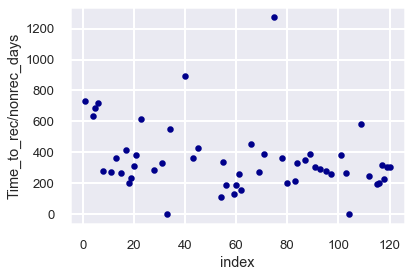

In [147]:
Time_to_rec= df_rec_pt300[["Time_to_rec/nonrec_days"]].reset_index()
Time_to_rec.fillna('', inplace=True)
ax=Time_to_rec.plot.scatter(x= "index", y="Time_to_rec/nonrec_days", c='DarkBlue')
print(Time_to_rec.mean())
print(Time_to_rec.median())

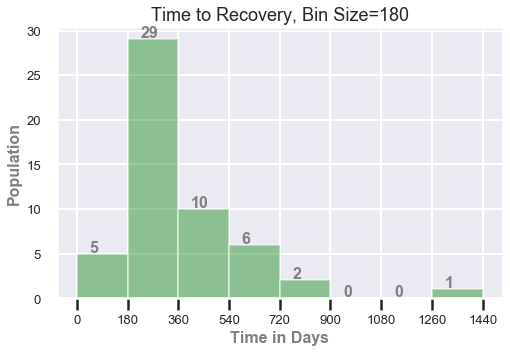

In [148]:
###plot the T value histogram

sns.set_style("darkgrid")
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})
binsize=180

bins=np.arange(0, 1500, binsize)
fig, ax = plt.subplots(figsize = (8,5))

(n, bins, patches) = plt.hist(Time_to_rec["Time_to_rec/nonrec_days"], bins=bins,color="green", alpha=0.4)

#decorate

plt.title("Time to Recovery, Bin Size="+ str(int(binsize)),fontsize=18)
plt.xlabel("Time in Days", fontsize=16, fontweight="bold",color="gray")
plt.ylabel("Population", fontsize=16,fontweight="bold", color="gray")

ax.set_xticks(np.arange(0, 1500, 180))
ax.set_xticklabels(np.arange(0, 1500, 180))

# plot the label/text to each bin
for i in range(0, len(n)):
    x_pos = (bins[i + 1] - bins[i])/4 + bins[i]
    y_pos = n[i] + 0.2
    label = str(int(n[i])) # relative frequency of each bin
    ax.text(x_pos, y_pos, label,fontsize=16,fontweight="bold",color="gray" )
    ax.xaxis.tick_bottom()